In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle

### BERT

In [34]:
# Pickle 파일 읽기
with open('/content/drive/MyDrive/집교 2_Team P/lyrics_Embedding/all_embeddings_full.pkl', 'rb') as file:
    data = pickle.load(file)

# DataFrame으로 변환
df_embedding = pd.DataFrame(data, columns=['embedding', 'track_id'])

# track_id를 정수로 변환 (필요하다면)
df_embedding['track_id'] = df_embedding['track_id'].astype(int)

# 'embedding' 열을 768차원의 각 차원으로 나누기
# df_embedding[['embedding_{}'.format(i) for i in range(768)]] = pd.DataFrame(df_embedding['embedding'].tolist(), index=df_embedding.index)

# 'embedding' 열 삭제
# df_embedding = df_embedding.drop(['embedding'], axis=1)

# DataFrame 확인
print(df_embedding.head())


                                           embedding  track_id
0  [0.012072664, 0.17292306, 0.0061238254, 0.0707...         2
1  [-0.17554894, 0.24209566, 0.4195969, -0.185033...         8
2  [-0.096951924, 0.0034472912, 0.005701333, 0.01...      1524
3  [-0.21775067, 0.244962, 0.24090661, 0.1647732,...      1785
4  [-0.069424234, -0.016805744, 0.21406727, -0.27...      1787


Explained Variance Ratio: [0.15770627 0.0923581 ]


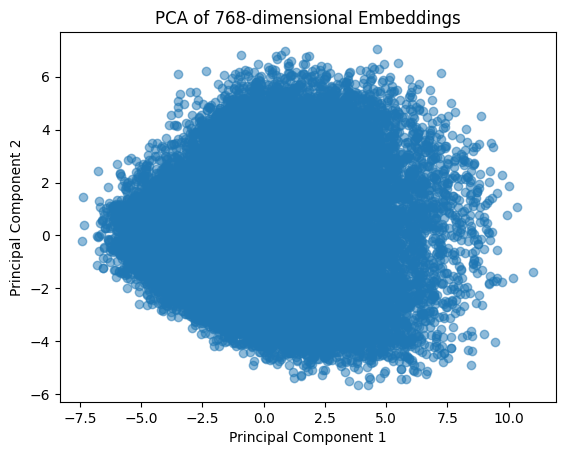

In [35]:

# 가상의 데이터 생성 (임의의 768차원 embedding 데이터)
num_songs = 31110
embedding_dim = 768

# PCA 수행
pca = PCA(n_components=2)  # 2개의 주성분 선택 (시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 시각화
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], alpha=0.5)
plt.title('PCA of 768-dimensional Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Explained Variance Ratio: [0.15770627 0.0923581  0.0616617 ]


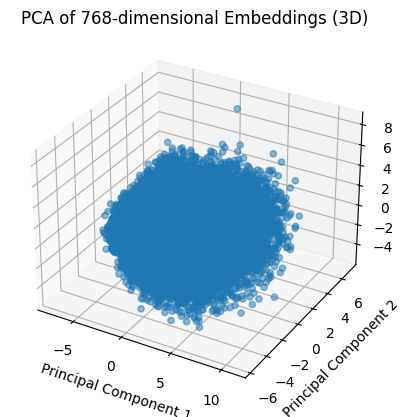

In [36]:
pca = PCA(n_components=3)  # 3개의 주성분 선택 (3D 시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 3D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], alpha=0.5)
ax.set_title('PCA of 768-dimensional Embeddings (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Explained Variance Ratio: [0.15770627 0.0923581  0.0616617  0.04492222]


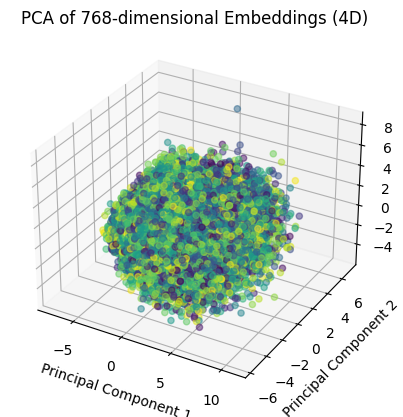

In [37]:
# PCA 수행
pca = PCA(n_components=4)  # 4개의 주성분 선택 (4D 시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 4D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 더미값 생성 (4D 시각화를 위해)
dummy_values = np.arange(num_songs)

# 각 데이터 포인트에 대해 4번째 차원으로 dummy_values 사용
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], c=dummy_values, cmap='viridis', alpha=0.5)

ax.set_title('PCA of 768-dimensional Embeddings (4D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

### RoBERTa


In [38]:
# Pickle 파일 읽기
with open('/content/drive/MyDrive/집교 2_Team P/lyrics_Embedding/all_embeddings_roberta_full.pkl', 'rb') as file:
    data = pickle.load(file)

# DataFrame으로 변환
df_embedding = pd.DataFrame(data, columns=['embedding', 'track_id'])

# track_id를 정수로 변환 (필요하다면)
df_embedding['track_id'] = df_embedding['track_id'].astype(int)

# 'embedding' 열을 768차원의 각 차원으로 나누기
# df_embedding[['embedding_{}'.format(i) for i in range(768)]] = pd.DataFrame(df_embedding['embedding'].tolist(), index=df_embedding.index)

# 'embedding' 열 삭제
# df_embedding = df_embedding.drop(['embedding'], axis=1)

# DataFrame 확인
print(df_embedding.head())


                                           embedding  track_id
0  [-0.12158579, -7.7443256e-05, -0.0053676204, -...         2
1  [-0.09675782, 0.013993852, -0.015174615, -0.16...         8
2  [-0.093518496, -0.0029156643, -0.010224976, -0...      1524
3  [-0.093399145, 0.04077526, -0.01454136, -0.175...      1785
4  [-0.09469494, -0.010988763, -0.008885505, -0.1...      1787


Explained Variance Ratio: [0.20736517 0.08504675]


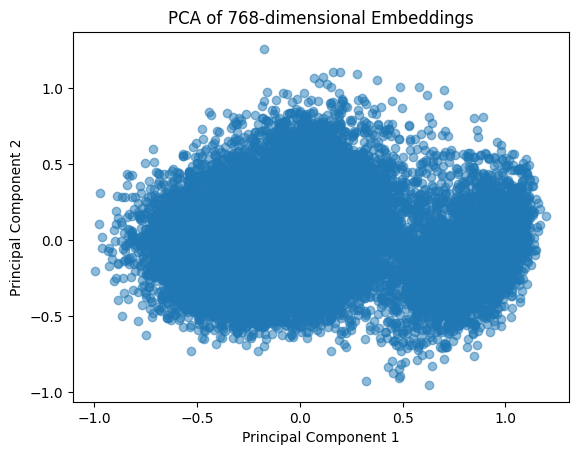

In [39]:

# 가상의 데이터 생성 (임의의 768차원 embedding 데이터)
num_songs = 31110
embedding_dim = 768

# PCA 수행
pca = PCA(n_components=2)  # 2개의 주성분 선택 (시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 시각화
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], alpha=0.5)
plt.title('PCA of 768-dimensional Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Explained Variance Ratio: [0.20736517 0.08504675 0.054356  ]


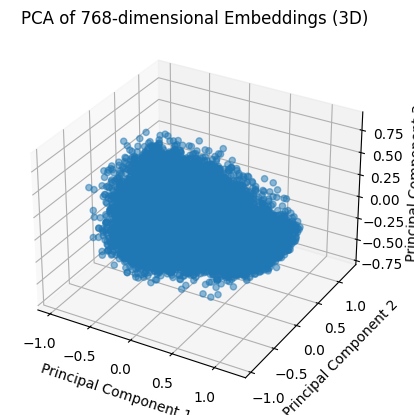

In [40]:
pca = PCA(n_components=3)  # 3개의 주성분 선택 (3D 시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 3D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], alpha=0.5)
ax.set_title('PCA of 768-dimensional Embeddings (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Explained Variance Ratio: [0.20736517 0.08504675 0.054356   0.04115457]


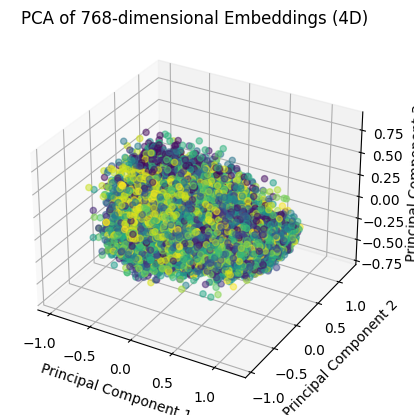

In [41]:
# PCA 수행
pca = PCA(n_components=4)  # 4개의 주성분 선택 (4D 시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 4D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 더미값 생성 (4D 시각화를 위해)
dummy_values = np.arange(num_songs)

# 각 데이터 포인트에 대해 4번째 차원으로 dummy_values 사용
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], c=dummy_values, cmap='viridis', alpha=0.5)

ax.set_title('PCA of 768-dimensional Embeddings (4D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

### LSTM

In [42]:
# Pickle 파일 읽기
with open('/content/drive/MyDrive/집교 2_Team P/lyrics_Embedding/lstm_outputs_merged.pkl', 'rb') as file:
    data = pickle.load(file)

# DataFrame으로 변환
df_embedding = pd.DataFrame(data, columns=['embedding', 'track_id'])

# track_id를 정수로 변환 (필요하다면)
df_embedding['track_id'] = df_embedding['track_id'].astype(int)

# 'embedding' 열을 768차원의 각 차원으로 나누기
# df_embedding[['embedding_{}'.format(i) for i in range(768)]] = pd.DataFrame(df_embedding['embedding'].tolist(), index=df_embedding.index)

# 'embedding' 열 삭제
# df_embedding = df_embedding.drop(['embedding'], axis=1)

# DataFrame 확인
print(df_embedding.head())


                                           embedding  track_id
0  [-0.20179361, 0.18552369, -0.11386657, 0.00375...         2
1  [-0.16733141, 0.19308521, -0.1055927, 0.136779...         8
2  [-0.19286135, 0.13035919, -0.13566753, 0.02671...      1524
3  [-0.19150019, 0.15346457, -0.1114238, 0.093935...      1785
4  [-0.21802717, 0.16726568, -0.12696394, 0.06847...      1787


Explained Variance Ratio: [0.22260995 0.09110748]


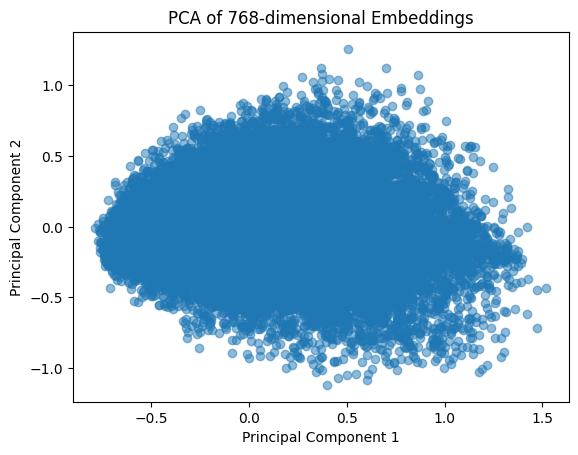

In [43]:

# 가상의 데이터 생성 (임의의 768차원 embedding 데이터)
num_songs = 31110
embedding_dim = 768

# PCA 수행
pca = PCA(n_components=2)  # 2개의 주성분 선택 (시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 시각화
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], alpha=0.5)
plt.title('PCA of 768-dimensional Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Explained Variance Ratio: [0.22260995 0.09110748 0.08555505]


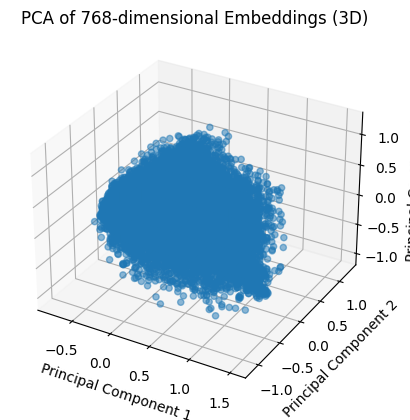

In [44]:
pca = PCA(n_components=3)  # 3개의 주성분 선택 (3D 시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 3D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], alpha=0.5)
ax.set_title('PCA of 768-dimensional Embeddings (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Explained Variance Ratio: [0.22260995 0.09110748 0.08555505 0.06961132]


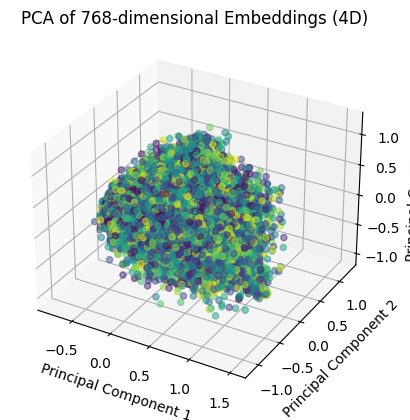

In [45]:
# PCA 수행
pca = PCA(n_components=4)  # 4개의 주성분 선택 (4D 시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 4D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 더미값 생성 (4D 시각화를 위해)
dummy_values = np.arange(num_songs)

# 각 데이터 포인트에 대해 4번째 차원으로 dummy_values 사용
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], c=dummy_values, cmap='viridis', alpha=0.5)

ax.set_title('PCA of 768-dimensional Embeddings (4D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

### BERT emotion


In [46]:
# Pickle 파일 읽기
with open('/content/drive/MyDrive/집교 2_Team P/lyrics_Embedding/all_embeddings_emotion_full.pkl', 'rb') as file:
    data = pickle.load(file)

# DataFrame으로 변환
df_embedding = pd.DataFrame(data, columns=['embedding', 'track_id'])

# track_id를 정수로 변환 (필요하다면)
df_embedding['track_id'] = df_embedding['track_id'].astype(int)

# 'embedding' 열을 768차원의 각 차원으로 나누기
# df_embedding[['embedding_{}'.format(i) for i in range(768)]] = pd.DataFrame(df_embedding['embedding'].tolist(), index=df_embedding.index)

# 'embedding' 열 삭제
# df_embedding = df_embedding.drop(['embedding'], axis=1)

# DataFrame 확인
print(df_embedding.head())


                                           embedding  track_id
0  [-0.7747855, -0.4393492, 0.8827976, 0.5041653,...         2
1  [-0.05353763, -0.3497014, 0.41607994, 0.289434...         8
2  [-0.7386549, -0.53442806, 0.3141608, 0.384558,...      1524
3  [-0.35336906, 0.3955285, 0.1589705, -0.5695985...      1785
4  [-0.3986652, -0.5083513, 0.81219405, -0.062965...      1787


Explained Variance Ratio: [0.24144274 0.19656595]


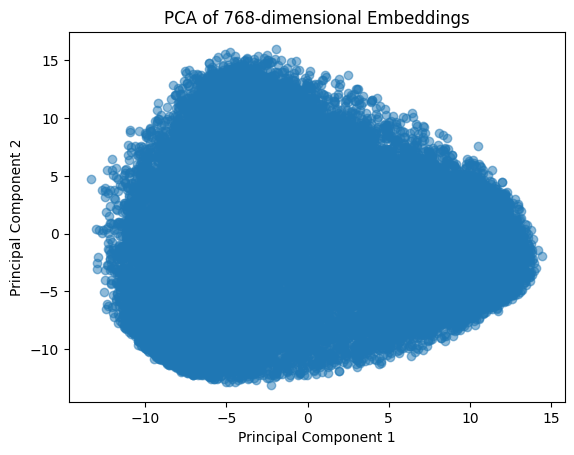

In [47]:

# 가상의 데이터 생성 (임의의 768차원 embedding 데이터)
num_songs = 31110
embedding_dim = 768

# PCA 수행
pca = PCA(n_components=2)  # 2개의 주성분 선택 (시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 시각화
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], alpha=0.5)
plt.title('PCA of 768-dimensional Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Explained Variance Ratio: [0.24144274 0.19656595 0.13364886]


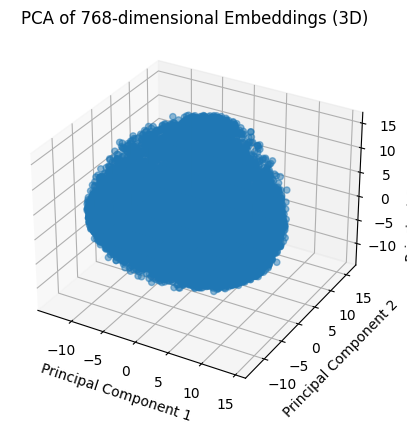

In [48]:
pca = PCA(n_components=3)  # 3개의 주성분 선택 (3D 시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 3D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], alpha=0.5)
ax.set_title('PCA of 768-dimensional Embeddings (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Explained Variance Ratio: [0.24144274 0.19656595 0.13364886 0.10301442]


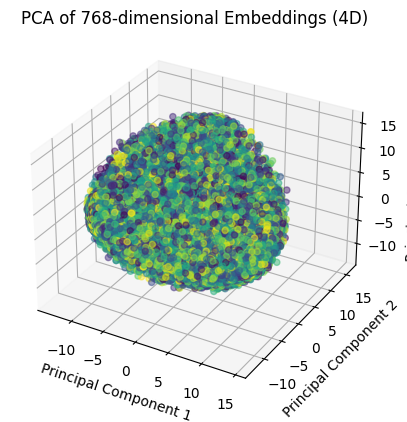

In [49]:
# PCA 수행
pca = PCA(n_components=4)  # 4개의 주성분 선택 (4D 시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 4D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 더미값 생성 (4D 시각화를 위해)
dummy_values = np.arange(num_songs)

# 각 데이터 포인트에 대해 4번째 차원으로 dummy_values 사용
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], c=dummy_values, cmap='viridis', alpha=0.5)

ax.set_title('PCA of 768-dimensional Embeddings (4D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

### RoBERTa emotion

In [50]:
# Pickle 파일 읽기
with open('/content/drive/MyDrive/집교 2_Team P/lyrics_Embedding/all_embeddings_roberta-emotion_full.pkl', 'rb') as file:
    data = pickle.load(file)

# DataFrame으로 변환
df_embedding = pd.DataFrame(data, columns=['embedding', 'track_id'])

# track_id를 정수로 변환 (필요하다면)
df_embedding['track_id'] = df_embedding['track_id'].astype(int)

# 'embedding' 열을 768차원의 각 차원으로 나누기
# df_embedding[['embedding_{}'.format(i) for i in range(768)]] = pd.DataFrame(df_embedding['embedding'].tolist(), index=df_embedding.index)

# 'embedding' 열 삭제
# df_embedding = df_embedding.drop(['embedding'], axis=1)

# DataFrame 확인
print(df_embedding.head())


                                           embedding  track_id
0  [-0.43970332, 0.17358397, 0.52987355, 0.215903...         2
1  [-0.91214895, -0.50413597, -0.6426596, 0.88957...         8
2  [-0.35779303, -0.21245702, -0.4350589, 1.27470...      1524
3  [-0.5116009, 0.5157131, 0.46193805, -0.3704641...      1785
4  [-1.1975511, 0.5550555, -0.049068704, 0.417929...      1787


Explained Variance Ratio: [0.16864343 0.14925671]


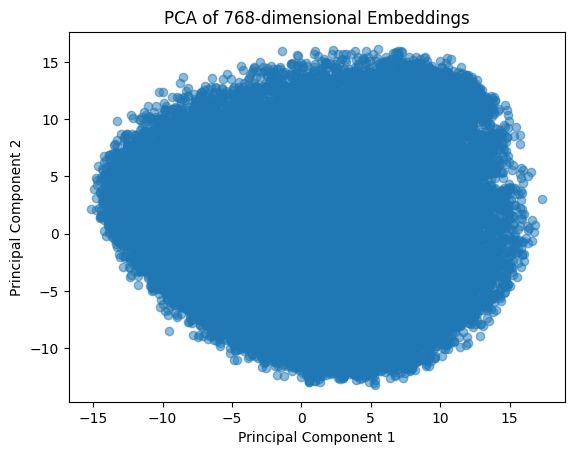

In [51]:

# 가상의 데이터 생성 (임의의 768차원 embedding 데이터)
num_songs = 31110
embedding_dim = 768

# PCA 수행
pca = PCA(n_components=2)  # 2개의 주성분 선택 (시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 시각화
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], alpha=0.5)
plt.title('PCA of 768-dimensional Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Explained Variance Ratio: [0.16864343 0.14925671 0.08021718]


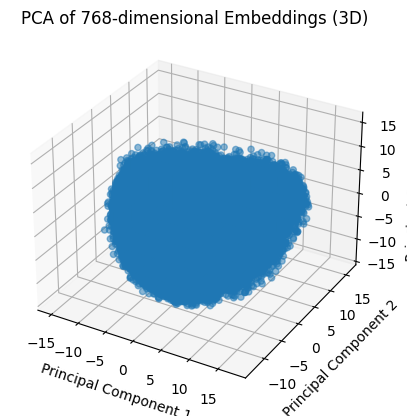

In [52]:
pca = PCA(n_components=3)  # 3개의 주성분 선택 (3D 시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 3D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], alpha=0.5)
ax.set_title('PCA of 768-dimensional Embeddings (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Explained Variance Ratio: [0.16864343 0.14925671 0.08021718 0.07830297]


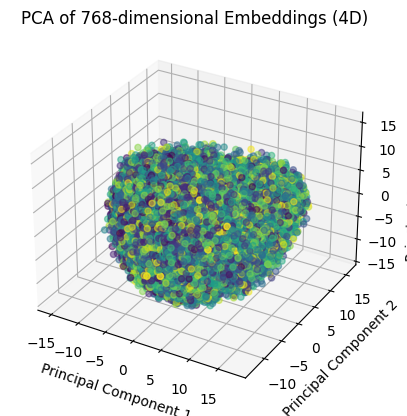

In [53]:
# PCA 수행
pca = PCA(n_components=4)  # 4개의 주성분 선택 (4D 시각화를 위해)
embedding_pca = pca.fit_transform(df_embedding['embedding'].tolist())

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 4D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 더미값 생성 (4D 시각화를 위해)
dummy_values = np.arange(num_songs)

# 각 데이터 포인트에 대해 4번째 차원으로 dummy_values 사용
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], c=dummy_values, cmap='viridis', alpha=0.5)

ax.set_title('PCA of 768-dimensional Embeddings (4D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()